# Lab-7-Starter

Rename notebook to include your name and ID.  
Submit into **eLearning** and Github (optional)

## Load data

Load data from provided dataset (on eLearning).  
Target column is `y` and it is last column in the dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
ds1 = pd.read_csv("lab_7_data.csv")

In [3]:
ds1.shape

(1000, 201)

In [4]:
ds1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,y
0,0.416251,0.187764,1.392731,0.302238,-0.053183,-1.598608,1.441321,-0.033600,-0.163162,0.016415,...,-1.129246,-1.874810,-0.599429,1.416135,-0.176389,-0.431767,1.300498,1.531078,-0.880436,0
1,-0.890983,-0.794026,0.251547,0.010026,-3.302863,-0.634802,-0.650848,-0.247151,-0.455664,1.074897,...,1.033471,-0.146153,-1.416427,-1.756438,-0.383269,-0.387179,-1.178079,0.731939,-0.794590,0
2,-0.143477,-0.216075,0.932037,0.671241,0.175003,0.640659,-1.138888,-1.394558,-1.135144,0.930762,...,-0.687676,-1.797068,0.217285,-0.120996,1.451940,0.709817,0.057776,-0.506289,1.672958,1
3,-1.134521,-0.038174,-1.332362,0.731847,-0.139031,-1.840960,0.951646,-0.904985,-1.168059,0.217766,...,-0.798943,0.713069,-0.535899,-0.256444,-0.084702,0.257521,0.686006,-0.908159,-1.131168,1
4,2.142828,2.214348,-0.322788,-0.811791,-0.418127,0.203688,-0.219648,0.050074,0.416546,-0.482434,...,1.397517,0.764536,-0.906014,-0.433268,-0.315009,-0.253783,1.702297,-0.904033,-1.016026,0


## Question 1

Use PCA to reduce the size of the feature space while retaining 90% of the explained variance. What is the size of the transformed feature space? (Number of features in the reduced dataset)

You should keep target column `y` as is (don't include in PCA)

In [5]:
X = ds1.drop(columns = ['y'])
y = ds1['y']

In [6]:
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0,0.416251,0.187764,1.392731,0.302238,-0.053183,-1.598608,1.441321,-0.033600,-0.163162,0.016415,...,2.663671,-1.129246,-1.874810,-0.599429,1.416135,-0.176389,-0.431767,1.300498,1.531078,-0.880436
1,-0.890983,-0.794026,0.251547,0.010026,-3.302863,-0.634802,-0.650848,-0.247151,-0.455664,1.074897,...,-0.448739,1.033471,-0.146153,-1.416427,-1.756438,-0.383269,-0.387179,-1.178079,0.731939,-0.794590
2,-0.143477,-0.216075,0.932037,0.671241,0.175003,0.640659,-1.138888,-1.394558,-1.135144,0.930762,...,-5.244217,-0.687676,-1.797068,0.217285,-0.120996,1.451940,0.709817,0.057776,-0.506289,1.672958
3,-1.134521,-0.038174,-1.332362,0.731847,-0.139031,-1.840960,0.951646,-0.904985,-1.168059,0.217766,...,-0.523081,-0.798943,0.713069,-0.535899,-0.256444,-0.084702,0.257521,0.686006,-0.908159,-1.131168
4,2.142828,2.214348,-0.322788,-0.811791,-0.418127,0.203688,-0.219648,0.050074,0.416546,-0.482434,...,-3.346294,1.397517,0.764536,-0.906014,-0.433268,-0.315009,-0.253783,1.702297,-0.904033,-1.016026


In [7]:
from sklearn.decomposition import PCA

In [8]:
components = list(np.arange(10,160,10))
var = []

In [9]:
print("n_components","  ","Explained Variance")
print("---------------   -------------------------")
for i in components:
    model1 = PCA(n_components = i)
    model1.fit(X)
    var.append(model1.explained_variance_ratio_.sum())
    print(i,"                ",model1.explained_variance_ratio_.sum())

n_components    Explained Variance
---------------   -------------------------
10                  0.522175178082247
20                  0.5885111911719436
30                  0.6292208343547059
40                  0.6670037830466105
50                  0.7023363670250852
60                  0.7356372977544667
70                  0.7670981299206504
80                  0.7956557611203992
90                  0.8220262198041381
100                  0.8470385670063956
110                  0.8696743981603579
120                  0.8909501936391981
130                  0.9104205420317162
140                  0.9285456962300243
150                  0.9450618816407186


From the above model, we can observe that at n_components >= 130, the total explained variable is reaching 90% and going above. So according the results, 130 components would be the close to achive the targeted variance.

In [10]:
model1 = PCA(n_components=130)

In [11]:
model1.fit(X)

PCA(n_components=130)

In [12]:
print(model1.explained_variance_ratio_)

[0.14932855 0.09818347 0.08602535 0.05764906 0.04275844 0.0240874
 0.019225   0.01678984 0.01458044 0.01354764 0.01208601 0.01001565
 0.00887983 0.00694007 0.00617849 0.0049281  0.00479287 0.00463263
 0.00457444 0.00451054 0.00444087 0.00438555 0.00431046 0.00429914
 0.00426401 0.00420567 0.00419462 0.00413182 0.00411489 0.00407898
 0.00403303 0.00398182 0.0039471  0.00390868 0.00390077 0.00383602
 0.00379545 0.00377968 0.00375715 0.00373082 0.0036934  0.00367505
 0.00366405 0.00363828 0.00361913 0.00361333 0.00356544 0.00352862
 0.00351628 0.00345872 0.00342439 0.00340884 0.00339445 0.0033762
 0.0033672  0.00329984 0.00328595 0.00326169 0.00323189 0.00319326
 0.0031833  0.00316801 0.00315226 0.00312173 0.00309483 0.00307275
 0.00303587 0.00300393 0.00298362 0.00294966 0.00293467 0.00290023
 0.00288511 0.00286592 0.00285972 0.0028497  0.00282095 0.00279237
 0.002777   0.00275625 0.00272659 0.00270349 0.00268668 0.00267771
 0.00264776 0.00264237 0.00260933 0.00255456 0.00254374 0.002516

In [13]:
print(model1.explained_variance_ratio_.sum())

0.9103855007788249


In [14]:
len(model1.explained_variance_ratio_)

130

## Question 2

Use original dataset. Split it to Train and Test, 80/20 ratio. 

Train a SVC with kernel 'rbf', gamma = 'auto', and C = 10. 
Target column is `y`. 

Report following metrics on test dataset:
- Confusion matrix
- F1 weighted

Set random_state = 142 on all models and functions with this argument.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=142)

In [17]:
x_train.shape,x_test.shape

((750, 200), (250, 200))

In [18]:
from sklearn.svm import SVC

In [19]:
model2 = SVC(kernel = 'rbf',gamma = 'auto',C=10,random_state=142)

In [20]:
model2.fit(x_train,y_train)

SVC(C=10, gamma='auto', random_state=142)

In [21]:
pred1 = model2.predict(x_test)

In [22]:
pd.crosstab(y_test,pred1)

col_0,0,1
y,,
0,127,10
1,4,109


In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_test, pred1, average='weighted')

0.9440972722593927

## Question 3

Use dataset with 0.90 variance preserve (Question 1) . Split it to Train and Test, 80/20 ratio. 

Train a SVC with kernel 'rbf', gamma = 'auto', and C = 10. 
Target column is `y`. 

Report following metrics on test dataset:
- Confusion matrix
- F1 weighted

Set random_state = 142 on all models and functions with this argument.

How the model results are different from the results in Q2?  
Argue in favor and against using PCA to reduce number of features in this scenario. Provide at least two arguments for each. 

In [25]:
X_train = model1.fit_transform(x_train)

In [26]:
X_test = model1.transform(x_test)

In [27]:
model3 = SVC(kernel = 'rbf',gamma = 'auto',C=10,random_state=142)

In [28]:
model3.fit(X_train,y_train)

SVC(C=10, gamma='auto', random_state=142)

In [29]:
pred2 = model3.predict(X_test)

In [30]:
pd.crosstab(y_test,pred2)

col_0,0,1
y,,
0,125,12
1,6,107


In [31]:
f1_score(y_test, pred2, average='weighted')

0.928125064333505

# Question 4

Refer to this notebook example: https://github.com/h2oai/h2o-tutorials/blob/master/best-practices/glrm/GLRM_BestPractices.ipynb

Train H2O GLRM model on the input dataset (minus column `y`).
Use following parameters to define model:
```
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

```

The model will compress dataset to two features only.
Our goal is to understand what features ("col0" to col_199") are close to each other. We will use visual two-dimensional graph to do it.

Once you have produced graph, annotate points which are close. Annotate at least two pairs.

If you cannot produce graph, identify two pairs of points using Euclidian distance.


In [32]:
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,37 mins 26 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_dasariramesh_rjihn4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.441 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [33]:
ds2 = h2o.import_file("lab_7_data.csv")
ds2.head()

col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0.416251,0.187764,1.39273,0.302238,-0.0531831,-1.59861,1.44132,-0.0335995,-0.163162,0.0164152,-0.738478,-1.84971,1.81947,0.0418063,-1.35822,1.3109,-0.723951,-1.99558,0.293012,-1.30577,-0.41234,0.68546,1.88746,1.77361,-0.351711,-1.05013,0.251686,-1.42131,-1.2733,1.01172,0.26003,0.825121,-0.108814,0.780638,0.637224,-0.9503,0.173089,0.150942,-0.0305828,0.45466,-1.40532,-0.0967276,0.0618317,2.05136,-0.865441,0.610649,-0.418626,-1.43112,1.49209,-0.161552,-1.24324,0.543092,-1.50118,1.22453,0.293119,0.101657,0.52998,-1.03241,0.185001,-1.01106,-0.162705,0.485731,-0.671475,-1.74282,1.5715,-0.0718316,0.637127,0.45079,-0.410897,0.297313,-0.460079,-1.35733,-0.571346,2.00468,1.55825,0.796877,-0.226563,0.643372,-4.9751,1.09305,0.147693,-0.473244,-0.456848,1.88188,-0.224817,0.959515,1.46294,-1.25663,-0.0998353,0.624259,0.0934701,-0.823858,1.16898,1.3678,-0.496845,-0.800347,0.244775,0.0165619,0.761913,-1.00149,0.689013,-1.00227,1.17933,1.27233,1.8488,-0.756218,0.722778,1.11239,-0.0576231,-0.296038,0.879889,-1.56128,1.26778,-1.2823,-0.873289,2.08332,-0.456981,-0.0327925,-0.632079,-0.247328,0.0421456,0.675244,0.469047,-0.379155,0.69398,-0.102418,-0.804938,-0.654579,-2.37742,-0.338895,0.144955,-0.618801,0.39345,-0.230672,-1.8356,0.0728309,-1.28117,1.75176,0.474793,-2.30184,-1.5324,0.26262,-0.0993723,-0.12701,-2.93816,0.235647,-0.803401,-0.0218766,1.83169,0.372421,-0.376905,-0.973555,-0.54647,0.475447,0.520637,-0.06481,0.132856,-0.68471,1.62183,-0.93621,2.25076,0.324182,-3.08533,0.767323,-0.125211,0.339742,0.0457274,0.380506,-0.546514,-0.434207,0.763424,-1.07725,-0.176497,-0.414853,-1.21893,-0.110836,1.15252,3.4912,-0.389255,0.752048,0.176269,0.646345,0.860553,-0.435836,0.123867,0.679564,0.559306,0.192639,0.611412,-1.0137,2.66367,-1.12925,-1.87481,-0.599429,1.41614,-0.176389,-0.431767,1.3005,1.53108,-0.880436
-0.890983,-0.794026,0.251547,0.0100257,-3.30286,-0.634802,-0.650848,-0.247151,-0.455664,1.0749,-0.800816,-0.310957,-5.37735,-1.01944,-0.246994,-5.93199,-0.349498,-0.820743,-6.14741,-0.020613,0.93899,4.74535,10.7213,-2.00214,1.24333,1.0428,0.25924,-1.53242,-1.16892,1.02192,-0.0885617,0.704052,1.38288,-1.0932,-0.450838,0.386544,-1.28155,-0.747141,-1.76145,-0.762084,-0.882164,-0.0345333,-1.41859,-2.55517,-0.0748364,3.50997,-1.17616,0.108852,0.992169,-0.503793,-0.717657,0.105137,-0.449123,-0.573706,-0.42745,0.637566,-1.6538,-0.239487,-0.306202,-1.06277,-0.991776,0.215169,0.404328,1.14434,12.9281,1.23785,-0.154762,-0.241385,-1.31052,-0.540513,0.959618,0.138273,-0.185039,-2.1032,-1.7132

In [34]:
cols = [x for x in ds2.columns if x not in ['y']]

In [35]:
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

In [36]:
rank2_model.train(training_frame=ds2,x=cols)

Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  rank2


Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,1000.0,0.002081,157702.812594




ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 197588.6280982432
Misclassification Error (Categorical): 0.0

Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2022-04-12 09:13:17,0.224 sec,0.0,1.050000,159347.069090
1,,2022-04-12 09:13:17,0.231 sec,1.0,1.102500,159322.040813
2,,2022-04-12 09:13:17,0.237 sec,2.0,0.735000,159322.040813
3,,2022-04-12 09:13:17,0.244 sec,3.0,0.771750,159151.952754
4,,2022-04-12 09:13:17,0.252 sec,4.0,0.810338,159018.003600
5,,2022-04-12 09:13:17,0.259 sec,5.0,0.850854,158880.641956
6,,2022-04-12 09:13:17,0.270 sec,6.0,0.893397,158707.278649
7,,2022-04-12 09:13:17,0.278 sec,7.0,0.938067,158560.703514
8,,2022-04-12 09:13:18,0.288 sec,8.0,0.984970,158468.102219
9,,2022-04-12 09:13:18,0.301 sec,9.0,0.656647,158468.102219



See the whole table with table.as_data_frame()


In [37]:
X = h2o.get_frame("rank2_full")
Y = rank2_model.archetypes()

In [38]:
import pandas as pd

archetypes_cols = rank2_model._model_json["output"]["archetypes"].as_data_frame().reset_index(drop=True).columns.to_list()
archetypes_y = pd.DataFrame({'Arch1':Y[0],'Arch2':Y[1], 'attribute':archetypes_cols[1:]})
archetypes_y.head(n=20)

,Arch1,Arch2,attribute
0,0.238183,-0.107732,col_0
1,-0.308881,0.289964,col_1
2,0.351583,-0.305058,col_2
3,0.163771,0.043018,col_3
4,-0.154869,0.090022,col_4
5,-0.033707,0.028767,col_5
6,0.084687,-0.010929,col_6
7,-0.055211,0.150909,col_7
8,0.089189,-0.080761,col_8
9,-0.053144,0.145647,col_9


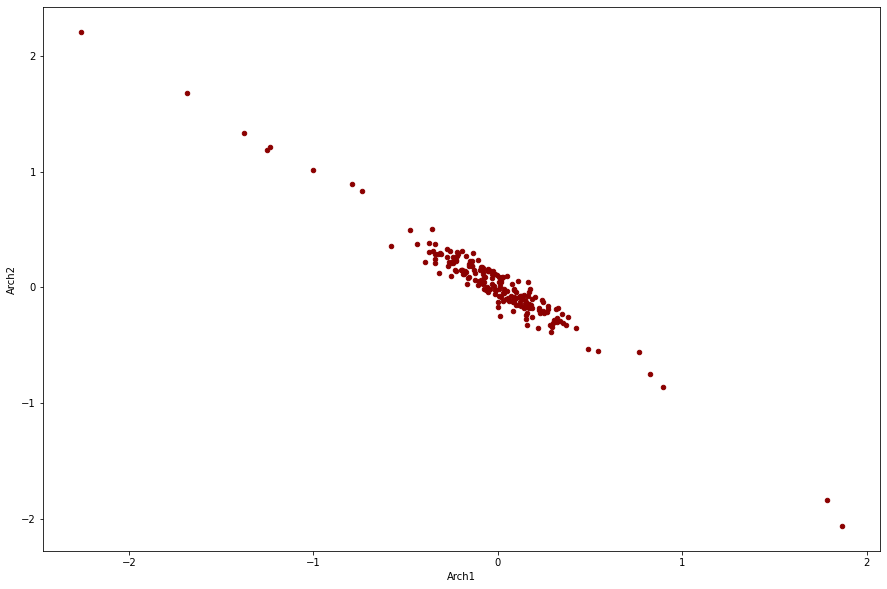

In [39]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = [15, 10]

ax1 = archetypes_y.plot.scatter(x='Arch1',
                                y='Arch2',
                                c='DarkRed')
for i, txt in enumerate(archetypes_cols[1:]):
    if txt in ["sqft_lot", "sqft_lot15", "floors", "bedrooms", "price", "waterfront0", "waterfront1"]:
        ax1.annotate(txt, (Y[0][i]+random.uniform(-0.2,0.2), Y[1][i]+random.uniform(-0.2,0.2)))

plt.show()